<h1><B>Customer Lifetime Value</B></h1>
CAR INSURANCE

By Hari Prasetyo
***

### **1. Business Problem Understanding**

**1.1 CONTEXT**

Perusahan asuransi mobil sangat bergantung pada customer dalam menghasilkan keuntungan bagi perusahaan. Terdapat dua cara perusahaan untuk mendapatkan keuntungan tersebut. Cara pertama adalah dengan ***Acquaired***, yaitu mencari dan mendapatkan *customer* sebanyak-banyaknya. Kedua adalah ***Retained***, yaitu mempertahankan *customer* agar tetap setia menjadi pelanggan perusahaan, tidak berhenti atau macet pembayaran premi asuransinya. Kedua hal tersebut dapat dinilai dengan nilai CLV.

***Customer Lifetime Value*** (**CLV**) adalah nilai dari seorang *customer* terhadap sebuah perusahaan selama ia menjadi pelanggan perusahaan tersebut. Atau bisa dikatakan berapa keuntungan yang bisa diperoleh dari konsumen tersebut apabila *customer* tersebut loyal pada perusahaan. Semakin tinggi nilai CLV maka semakin bagus, semakin besar profit yang bisa didapatkan oleh perusahaan.

**1.2 PROBLEM STATEMENT**

* ***Persaingan yang ketat*** di industri asuransi mobil membuat perusahaaan mengeluarkan biaya yang lebih besar untuk *acquired customer*  baru agar tidak direbut oleh perusahaan lain.
* ***Perubahan perilaku customer*** yang sudah menjadi nasabah, seiring berjalannya waktu juga dapat menimbulkan hilangnya loyalitas pelanggan terhadap perusahaan sehingga perusahaan melakukan berbagai cara agar pelanggan tidak berhenti menjadi pelanggan. 
* Hal-hal tersebut menghasilkan ***biaya-biaya yang cukup besar*** padahal belum tentu sebanding dengan keuntungan yang didapatkan. 

Oleh karena itu muncul pertanyan dari masalah tersebut, yaitu:
1.  Apakah biaya pemasaran yang dikeluarkan untuk ***Acquired*** dan ***Retained*** sudah tepat sasaran?
2.  Apakah kita dapat memprediksi customer mana yang memiliki nilai ketuntungan yang tinggi bagi perusahaan?







<center><i> *"Apakah biaya yang dikeluarkan sebanding dengan nilai CLV customer yang ditargetkan?"* </i></center>

**1.3 GOALS**

Perusahaan ingin memiliki kemampuan untuk memprediksi nilai CLV seorang customer agar dapat mengestimasi berapa profit yang didapatkan sehingga perusahaan dapat mengatur berapa biaya yang dapat dikeluarkan. Perusahaan juga ingin mengetahui bagaimana karakteristik customer yang memiliki CLV yang tinggi agar dapat melakukan *acquired* dan *retained* dengan baik.




**1.4 ANALYTIC APPROACH**

Kita melakukan analisis untuk dapat menemukan pola dari fitur yang ada pada data customer asuransi. Kita akan membangun suatu model regresi yang dapat membantu perusahaan untuk dapat memprediksi nilai CLV dan melihat fitur apa yang memiliki pengaruh terhadap CLV.

**1.5 METRIC EVALUATION**

Evaluasi metrik yang sekiranya akan digunakan adalah MSE, RMSE, RMSPE, MAE, dan MAPE. MSE merupakan ragam dari residual, RMSE adalah nilai rataan akar kuadrat dari residual, RMSPE adalah akar rataan kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. 

Semakin kecil nilai RMSE, MAE, dan MAPE, maka model semakin baik dan semakin akurat dalam memprediksi nilai CLV. 

Akan dilakukan data understanding terlebih dahulu sebelum akhirnya akan mentukan metrics apa yang akan digunakan.
***

### **2. Data Understanding**



- Dataset merupakan data klien perusahaan yang sudah mengambil polis asuransi.
- Terdapat 11 kolom dimana setiap baris data merepresentasikan profil *customer*.

**Attributes Information**

|  | **Attribute** | **Data Type** | **Description** | **Class** |
| --- | --- | --- | --- | --- |
| 1 | Vehicle Class | Object | Jenis mobil | Profil Customer |
| 2 | Coverage | Object | Jenis perlindungan asuransi | Asuransi |
| 3 | Renew Offer Type  | Object | Tipe pembaruan polis yang expired | Asurasi  |
| 4 | EmploymentStatus | Object | Status pekerjaan | Profil Customer |
| 5 | Marital Status  | Object | Status pernikahan | Profil Customer |
| 6 | Education | Object | Pendidikan terakhir | Profil Customer |
| 7 | Number of Policies | float64 | Jumlah polis yang diambil | Asurasi |
| 8 | Monthly Premium Auto | float64 | Premi asuransi per bulan | Asurasi  |
| 9 | Total Claim Amount  | float64 | Jumlah yang sudah diklaim | Asurasi  |
| 10 | Income | float64 | Pendapatan customer | Profil Customer |
| 11 | Customer Lifetime Value | float64 | Nilai CLV ($) | Label / Target |

Data dikelompokkan menjadi 2 kelas yaitu kelas Profil Customer dan kelas Asuransi.
Dengan perbedaan: 
* Profil Customer : Profil dan karakteristik customer diluar data asuransi. Data bisa didapatkan **sebelum dia menjadi nasabah** perusahaan.
* Asuransi : Karakteristik asuransi yang diambil oleh nasabah. Data hanya bisa didapatkan jika customer **sudah menjadi nasabah** perusahaan.

Data yang termasuk Profil Customer dapat dijadikan acuan dalam proses *Acquired*. <br>
Data yang termasuk Asuransi dan juga Profil Customer dapat dijadikan acuan dalam proses *Retained*.

<br>

In [7]:
#Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
import shap

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, KFold

#Encoders
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor

#Scaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.pipeline import Pipeline

#Library Model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [8]:
df = pd.read_csv("data_customer_lifetime_value.csv")
display(df.head())


,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


In [9]:
display(df.describe())
df.describe(include=object)

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
mean,2.979361,93.026989,431.407103,37868.188569,8029.874592
std,2.393187,34.551795,287.558038,30490.490723,6916.708246
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,266.932542,0.000000,3954.344534
50%,2.000000,82.000000,379.200000,34322.000000,5800.188903
75%,4.000000,109.000000,549.986128,62464.000000,9031.214859
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education
count,5669,5669,5669,5669,5669,5669
unique,6,3,4,5,3,5
top,Four-Door Car,Basic,Offer1,Employed,Married,Bachelor
freq,2858,3477,2292,3541,3305,1703


In [10]:
pd.set_option('display.max_colwidth', None)

listItem = []
for kolom in df.columns :
    listItem.append( [kolom,
                      df[kolom].dtype,
                      df[kolom].isna().sum(), 
                      df[kolom].nunique(), 
                      df[kolom].unique()])

desc = pd.DataFrame(columns = ['Column','Data Type','Missing Value', 'nUnique', 'Unique'],
                       data = listItem)

desc


,Column,Data Type,Missing Value,nUnique,Unique
0,Vehicle Class,object,0,6,"[Four-Door Car, Two-Door Car, SUV, Sports Car, Luxury SUV, Luxury Car]"
1,Coverage,object,0,3,"[Extended, Basic, Premium]"
2,Renew Offer Type,object,0,4,"[Offer1, Offer3, Offer2, Offer4]"
3,EmploymentStatus,object,0,5,"[Retired, Employed, Disabled, Medical Leave, Unemployed]"
4,Marital Status,object,0,3,"[Divorced, Married, Single]"
5,Education,object,0,5,"[High School or Below, College, Master, Bachelor, Doctor]"
6,Number of Policies,float64,0,9,"[2.0, 6.0, 1.0, 8.0, 5.0, 3.0, 7.0, 4.0, 9.0]"
7,Monthly Premium Auto,float64,0,191,"[90.0, 62.0, 116.0, 107.0, 101.0, 66.0, 65.0, 117.0, 78.0, 63.0, 70.0, 71.0, 61.0, 64.0, 129.0, 100.0, 68.0, 126.0, 95.0, 128.0, 84.0, 125.0, 98.0, 97.0, 121.0, 192.0, 69.0, 83.0, 72.0, 67.0, 103.0, 74.0, 89.0, 86.0, 110.0, 124.0, 73.0, 191.0, 122.0, 133.0, 165.0, 127.0, 144.0, 114.0, 194.0, 118.0, 111.0, 138.0, 119.0, 76.0, 80.0, 154.0, 189.0, 130.0, 109.0, 161.0, 88.0, 93.0, 113.0, 87.0, 136.0, 106.0, 99.0, 105.0, 82.0, 96.0, 159.0, 181.0, 146.0, 115.0, 187.0, 108.0, 209.0, 102.0, 104.0, 77.0, 79.0, 283.0, 150.0, 92.0, 91.0, 180.0, 131.0, 112.0, 184.0, 137.0, 185.0, 94.0, 198.0, 135.0, 140.0, 132.0, 139.0, 85.0, 123.0, 214.0, 201.0, 155.0, 193.0, 81.0, ...]"
8,Total Claim Amount,float64,0,3274,"[571.479602, 114.51444, 257.248789, 556.8, 355.820799, 85.063708, 584.567645, 144.987956, 264.563772, 582.781896, 39.781368, 227.44626, 347.857619, 239.328571, 340.8, 439.2, 307.2, 1178.950186, 480.0, 350.65008, 51.961915, 907.2, 423.787608, 234.683628, 456.0, 614.4, 475.2, 286.781601, 788.206874, 600.0, 265.877583, 513.6, 196.37368, 312.0, 335.840529, 580.8, 1921.248929, 331.2, 389.636991, 229.620398, 159.266473, 291.91645, 321.6, 685.227276, 355.2, 616.005527, 395.729716, 302.4, 287.5426, 528.0, 282.500791, 135.892444, 316.8, 525.6, 604.8, 981.010879, 650.52179, 668.29397, 349.954886, 345.6, 638.4, 1452.213743, 609.6, 93.128128, 297.6, 292.8, 268.471802, 624.023564, 245.447622, 476.903351, 624.711448, 820.431905, 547.2, 469.257835, 1067.291208, 416.2618, 566.4, 40.622304, 497.126827, 314.880326, 938.513425, 307.639408, 482.4, 29.984815, 290.70096, 30.874869, 199.79727, 384.0, 41.464402, 739.2, 571.2, 460.741097, 532.8, 206.810286, 199.851173, 799.2, 142.205246, 114.815893, 44.284642, 336.0, ...]"
9,Income,float64,0,3625,"[11828.0, 44762.0, 21514.0, 17913.0, 19030.0, 94389.0, 25419.0, 26477.0, 36615.0, 59624.0, 37813.0, 35624.0, 24910.0, 62739.0, 18608.0, 46210.0, 0.0, 15192.0, 50397.0, 82210.0, 22538.0, 31614.0, 78358.0, 36510.0, 51962.0, 45345.0, 62039.0, 66550.0, 71134.0, 26721.0, 66726.0, 40672.0, 44685.0, 78804.0, 23616.0, 38667.0, 59961.0, 57117.0, 25221.0, 33806.0, 46051.0, 42526.0, 43963.0, 52819.0, 50450.0, 51972.0, 72421.0, 38183.0, 20325.0, 51032.0, 20567.0, 23671.0, 45302.0, 21102.0, 53565.0, 59797.0, 47509.0, 22239.0, 14665.0, 64801.0, 44986.0, 43817.0, 36845.0, 49259.0, 26486.0, 56446.0, 67787.0, 89464.0, 22475.0, 31972.0, 58089.0, 41990.0, 84903.0, 67137.0, 21450.0, 99874.0, 26100.0, 31275.0, 71186.0, 91580.0, 69417.0, 88592.0, 26806.0, 23656.0, 94527.0, 44096.0, 66839.0, 18643.0, 58682.0, 87002.0, 47725.0, 22244.0, 26245.0, 61085.0, 62464.0, 48367.0, 59207.0, 75007.0, 72874.0, 72540.0, ...]"


In [11]:
# Melihat jumlah duplikat
print("Total duplicate: ", df.duplicated().sum())

Total duplicate:  618


In [12]:
#Cek status Income = 0
df['EmploymentStatus'][df['Income']==0].unique()

array(['Unemployed'], dtype=object)

**Data Shape**<br>
Terdapat 5669 baris dan 11 kolom.

**Missing Value**<br>
Tidak terdapat missing value.

**Zero Values**<br>
Nilai 0 pada Kolom 'Income' bukanlah missing value, karena setelah dicek ternyata yang memiliki income 0 berstatus Unemployed. Bisa saja masih sekolah, kuliah atau ibu rumah tangga. Tidak ada penjelasan lebih lanjut.

**Duplicate**<br>
Terdapat duplikat sejumlah 618, namun karena tidak ada unique ID maka kita tidak dapat menyimpulkan data duplikat berasal dari orang yang sama. <br>Maka kita asumsikan hal tersebut adalah hal yang wajar.

**Data Type**<br>
terdapat 6 kolom bertipe object yang nantinya akan dilakukan encoding, merubah data kategorikal mejadi numerik.

,Vehicle Class,count
1,Luxury Car,107
2,Luxury SUV,115
4,Sports Car,307
3,SUV,1096
5,Two-Door Car,1186
0,Four-Door Car,2858


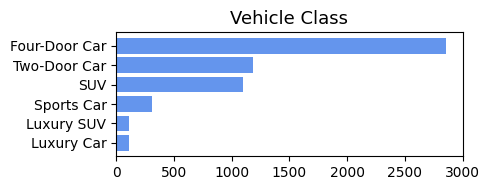

,Coverage,count
2,Premium,488
1,Extended,1704
0,Basic,3477


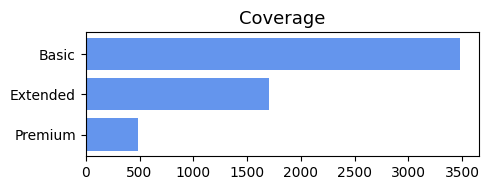

,Renew Offer Type,count
3,Offer4,642
2,Offer3,900
1,Offer2,1835
0,Offer1,2292


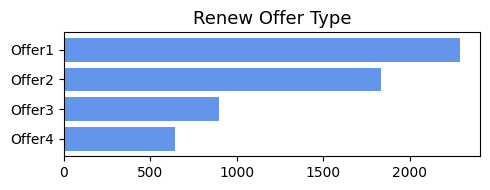

,EmploymentStatus,count
3,Retired,180
0,Disabled,252
2,Medical Leave,267
4,Unemployed,1429
1,Employed,3541


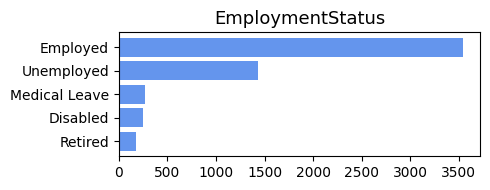

,Marital Status,count
0,Divorced,850
2,Single,1514
1,Married,3305


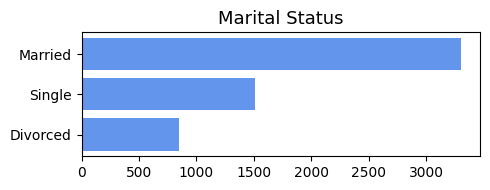

,Education,count
2,Doctor,226
4,Master,460
3,High School or Below,1620
1,College,1660
0,Bachelor,1703


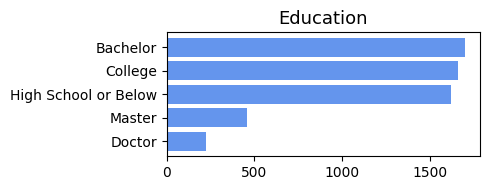

In [13]:
#Membuat grafik dari data kategorik
categoric = ['Vehicle Class', 'Coverage', 'Renew Offer Type', 'EmploymentStatus','Marital Status', 'Education']

for i in categoric:

    bar = df.groupby(i)[i].agg(['count']).reset_index().sort_values(by='count')
    display(bar)

    plt.figure(figsize = (5,2))
    plt.barh( bar[i], 
              bar['count'],color = 'cornflowerblue')
    plt.title(i, size = 13)
    plt.tight_layout()
    plt.show()

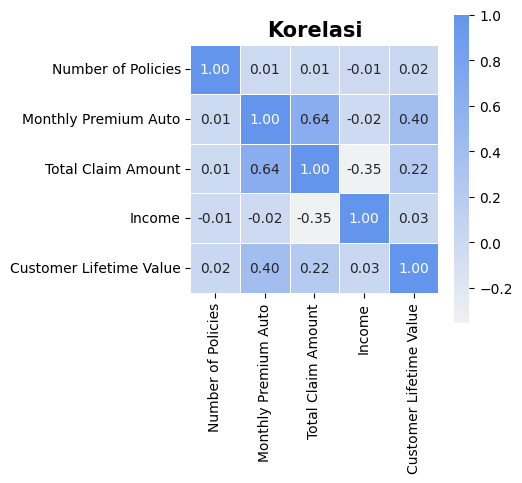

In [14]:
# Melihat korelasi nilai CLV dengan kolom numerik
corr = df.corr(numeric_only= True)

plt.figure(figsize=(4, 4))
warna=sns.light_palette("cornflowerblue", as_cmap=True)
sns.heatmap(corr, annot=True, fmt='.2f', cmap=warna, square=True, linewidths=0.5)
plt.title('Korelasi', size=15, weight='bold')
plt.show()

**Korelasi**<br>
Matrix korelasi menunjukkan bahwa '*Monthly Premium Auto*' memiliki korelasi positif yang sedikit kuat terhadap nilai CLV. Berarti semakin semakin tinggi premi bulanan yang dibayarkan oleh nasabah, maka semakin tinggi nilai CLV nasabah tersebut.

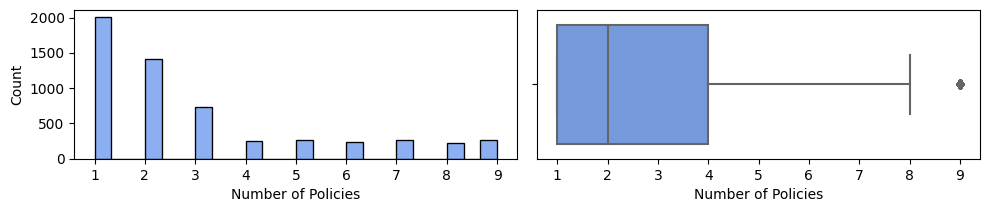

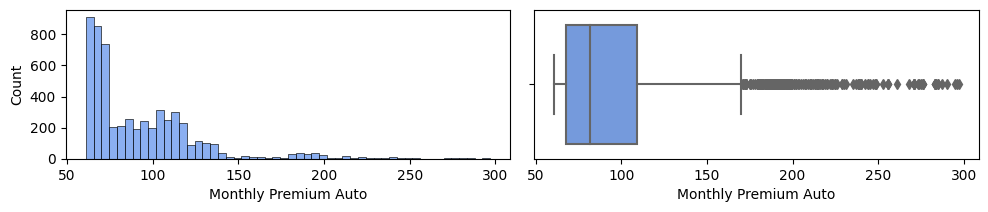

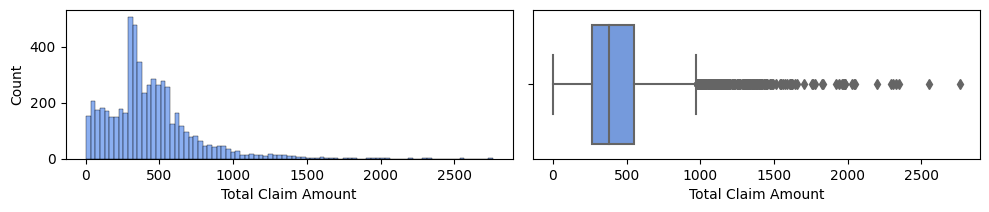

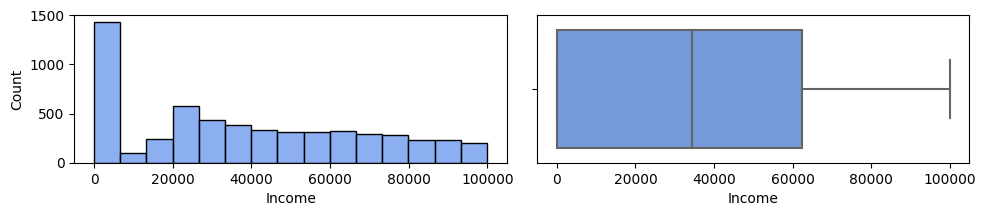

In [15]:
#Melihat distribusi data dan outlier pada data fitur numerik
numeric = ['Number of Policies','Monthly Premium Auto', 'Total Claim Amount', 'Income']

for i in numeric:
    plt.figure(figsize=(10, 8))
    sns.histplot(x=df[i], ax=plt.subplot(len(numeric),2,1),color='cornflowerblue')
    sns.boxplot(x=df[i], ax=plt.subplot(len(numeric),2,2),color='cornflowerblue')
    plt.tight_layout()
    plt.show()

**Outliers**<br>
Terdapat banyak outlier pada'*Total Claim Amount*' dan '*Monthly Premium Auto*'. Namun karena data merupakan data perusahaan asuransi, kita tidak akan menghapus data ouliers tersebut, karena bisa saja itu merupakan data dari nasabah potensial. Maka, outliers akan kita biarkan sebagaimana adanya.

**Distribusi Data**<br>
Terlihat bahwa semua data tidak ada yang terdistribusi normal, sejumlah besar nilai data terjadi di sisi kiri dengan lebih sedikit nilai data di sisi kanan (*right-skewed distribution*). Kita juga tidak akan menghapus datanya karena bisa saja merupakan data nasabah potensial.

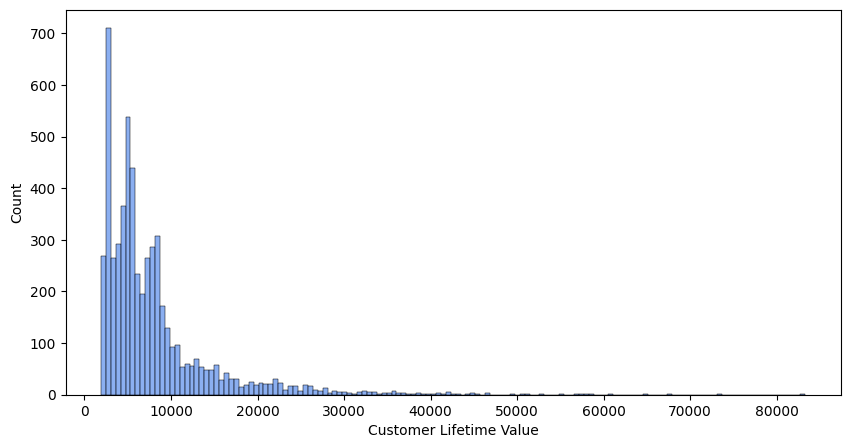

In [16]:
#melihat distribusi pada data label
plt.figure(figsize=(10,5))
sns.histplot(x=df['Customer Lifetime Value'],color='cornflowerblue')
plt.show()

Data pada CLV yang akan dijadikan label (y) juga terlihat miring ke kanan. Kita akan melakukan transformasi data untuk mengurangi kemiringannya agar dapat menambah tingkat akurasi modelnya.

Berdasarkan informasi di [StackExchange](https://stats.stackexchange.com/questions/107610/what-is-the-reason-the-log-transformation-is-used-with-right-skewed-distribution), bahwa transformasi yang paling banyak digunakan untuk *right skewed distribution* adalah transformasi logaritmik.<br>
Cara untuk transformasi logaritmik di [SKLearn](https://scikit-learn.org/stable/modules/generated/sklearn.compose.TransformedTargetRegressor.html).

**Drop Column**<br>
Kolom 'Renew Offer Type' adalah kolom berisi tipe pembaruan dari polis yang *expired*. Kolom tersebut kurang relevan untuk dimasukkan sebagai fitur pada model. Oleh karena itu kolom tersebut akan dihapus.


In [17]:
#Drop Kolom Renew Offer Type
dfmodel = df.drop(['Renew Offer Type'], axis=1)

In [18]:
dfmodel.head()

,Vehicle Class,Coverage,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


Kita akan menggunakan **'dfmodel'** sebagai data untuk pemodelan
***

### **3. Modelling**

**3.1 Encoding**<br>
Kolom '*Education*' akan dilakukan *encoding* menggunakan *Ordinal Encoder* karena kategorinya memiliki urutan.<br>
Sedangkan sisanya menggunakan *One Hot Encoder*.<br> Karena akan melakukan pemodelan regresi, maka akan dilakukan drop first pada *One Hot Encoding*.


In [19]:
#Encoding menggunakan One Hot Encoding dan 
onehotvar = ['Vehicle Class', 'Coverage', 'EmploymentStatus', 'Marital Status']

ordinalvar = ['Education']
ordinalmapping = [{'col':'Education',
              'mapping' : {None:0, 'High School or Below':1, 'College':2, 'Bachelor':3,'Master':4, 'Doctor':5 }}]

**3.2 Scaling**<br>
Karena data memiliki banyak outlier, maka akan dilakukan scaling menggunakan *Robust Scaler*.<br>
Seperti dituliskan pada [artikel](https://proclusacademy.com/blog/robust-scaler-outliers/) berikut, Robust Scaler menggunakan median dan IQR untuk scalingnya, sehingga lebih resisten terhadap outliers.


In [20]:
#Scaling menggunakan robust scaler karena data banyak outlier
scaler = RobustScaler()
scalervar = ['Number of Policies','Monthly Premium Auto', 'Total Claim Amount', 'Income']

#Transforming
transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), onehotvar),
    ('Ordinal',ce.OrdinalEncoder(mapping =ordinalmapping ),ordinalvar),
    ('Scaling',scaler,scalervar)
], remainder='passthrough')

**3.3 Data Splitting**

In [21]:
feature = dfmodel.drop(['Customer Lifetime Value'], axis=1)
label = dfmodel['Customer Lifetime Value']

In [22]:
X_train, X_test, y_train, y_test= train_test_split(
    feature,
    label,  
    test_size=0.3,
    random_state=10)

**3.4 Model Benchmarking**<br>
Tanpa Transformasi Logaritmik

**Models**<br>
Model yang digunkan adalah 5 model regresi yaitu *Linear Regression, KNN, Decision Tree, Random Forest dan XGB Regressor*. 

**Cross Validation**<br>
Dilakukan proses generalisasi berulang sebanyak 5 kali (*5 fold validation*.)

**Metrics Score**<br>
*MSE, RMSE & RMSPE* memiliki karakteristik sensitif terhadap outlier. Karena nilai label banyak terdapat outlier, maka metrics tersebut **tidak digunakan** dalam pemodelan kali ini.<br>
*MAE* dan *MAPE* memiliki karakteristik yg kurang sensitif terhadap outlier, maka akan kita gunakan metrics tersebut untuk pengukuran *model performance*.

**Log Transform**<br>
Kemudian akan dilakukan perbandingan antara model yang dilakukan transformasi logaritmik dengan yang tidak.

Setelah itu akan dipilih model terbaik yang memiliki akurasi prediksi terbaik berdasarkan *Metrics Score* yang sudah ditetapkan.

In [43]:
#Model Regresi
lr = LinearRegression()
knn = KNeighborsRegressor() 
dt = DecisionTreeRegressor(random_state=10)
rf = RandomForestRegressor(random_state=10)
xgb = XGBRegressor(random_state=10)

models = [lr, knn, dt, rf, xgb]

#cross validasi  dengan 5 fold validation
crossval = KFold(n_splits=5, shuffle=True, random_state=10)

mean_cv_mae = []
std_cv_mae = []

mean_cv_mape = []
std_cv_mape = []


for i in models:
    #Pipeline
    estimator = Pipeline([
    ("Preprocesing", transformer),
    ("Modeling", i)
    ])

    cv_mae = cross_val_score(estimator, X_train, y_train, cv=crossval, scoring='neg_mean_absolute_error')
    mean_cv_mae.append(cv_mae.mean())
    std_cv_mae.append(cv_mae.std())

    cv_mape = cross_val_score(estimator, X_train, y_train, cv=crossval, scoring='neg_mean_absolute_percentage_error')
    mean_cv_mape.append(cv_mape.mean())
    std_cv_mape.append(cv_mape.std())


In [44]:
#Membuat tabel metric score Benchmark Model tanpa Log Transform
metrics_cv = pd.DataFrame({
    'Model': ['Linear Regression','KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean MAE': mean_cv_mae,
    'Std MAE': std_cv_mae,
    'Mean MAPE': mean_cv_mape,
    'Std MAPE': std_cv_mape
})


**3.5 Model Benchmarking**<br>
Transformasi Logaritmik

In [47]:
# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

modelslog = [log_lr, log_knn, log_dt, log_rf, log_xgb]

crossval = KFold(n_splits=5, shuffle=True, random_state=10)

mean_cv_mae_log = []
std_cv_mae_log = []

mean_cv_mape_log = []
std_cv_mape_log = []

for i in modelslog:
    estimator = Pipeline([
    ("Preprocesing", transformer),
    ("Modeling", i)
    ])

    cv_mae_log = cross_val_score(estimator, X_train, y_train, cv=crossval, scoring='neg_mean_absolute_error')
    mean_cv_mae_log.append(cv_mae_log.mean())
    std_cv_mae_log.append(cv_mae_log.std())

    cv_mape_log = cross_val_score(estimator, X_train, y_train, cv=crossval, scoring='neg_mean_absolute_percentage_error')
    mean_cv_mape_log.append(cv_mape_log.mean())
    std_cv_mape_log.append(cv_mape_log.std())

In [48]:
#Membuat tabel metric score Benchmark Model dengan Log Transform
metrics_cv_log = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean MAE Log': mean_cv_mae_log,
    'Std MAE Log': std_cv_mae_log,
    'Mean MAPE Log': mean_cv_mape_log,
    'Std MAPE Log': std_cv_mape_log,
})
print('Metrics Tanpa Transformasi Logaritmik')
display(metrics_cv)
print('----')
print('Metrics Dengan Transformasi Logaritmik')
metrics_cv_log

Metrics Tanpa Transformasi Logaritmik


,Model,Mean MAE,Std MAE,Mean MAPE,Std MAPE
0,Linear Regression,-3953.741195,110.619728,-0.603337,0.016236
1,KNN Regressor,-3636.753910,138.741092,-0.504679,0.021566
2,DecisionTree Regressor,-1680.524487,147.267382,-0.118937,0.012592
3,RandomForest Regressor,-1541.698437,152.709283,-0.110861,0.011857
4,XGBoost Regressor,-1935.888160,129.692081,-0.197987,0.011261


----
Metrics Dengan Transformasi Logaritmik


,Model,Mean MAE Log,Std MAE Log,Mean MAPE Log,Std MAPE Log
0,Linear Regression,-3620.947293,149.812583,-0.426014,0.006087
1,KNN Regressor,-3210.853479,127.932111,-0.370160,0.016917
2,DecisionTree Regressor,-1642.222172,157.191268,-0.117807,0.012768
3,RandomForest Regressor,-1447.740651,140.033818,-0.097197,0.009424
4,XGBoost Regressor,-1551.452727,113.214998,-0.116509,0.008914


Pemodelan dengan transformasi logaritmik memiliki akurasi nilai yang lebih baik secara kesuluruhan.<br>
Maka, kita akan membandingkan model dari data yang sudah ditransformasi logaritmik saja.




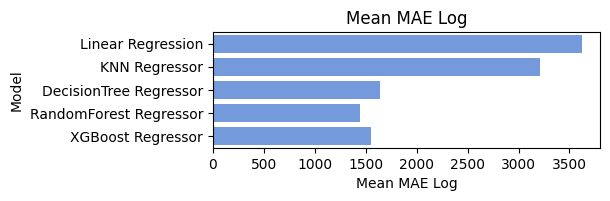

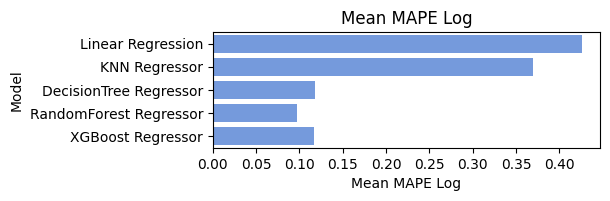

In [49]:
#Membuat visualiasi metric score dari data yang ditransformasi logaritmik
tabel_metrics_log = ['Mean MAE Log','Mean MAPE Log']

for i in tabel_metrics_log: 
    plt.figure(figsize=(5,1.5))
    sns.barplot(y= metrics_cv_log['Model'], x= metrics_cv_log[i].abs(), color = 'cornflowerblue')
    plt.title(i)
    plt.show()


**Model dengan Nilai Terbaik**<br>

**Random Forest Regressor**<br>
(*MAE: 1447.7, MAPE: 9,7%*)
 
**XGBoost Regressor** <br>
(*MAE: 1551.4, MAPE: 11,6%*).


**3.6 Predict on Test Set**

Kemudian dilakukan prediksi pada test set menggunakan 2 model tersebut.

In [28]:
# Benchmark pada 2 model terbaik
rf = RandomForestRegressor(random_state=10)
xgb = XGBRegressor(random_state=10)

models_test = [rf, xgb]

test_mae = []
test_mape = []

# Prediksi pada test set
for i in models_test:

    model = Pipeline([
    ("Preprocesing", transformer),
    ("Modeling", i)
    ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_mae.append(mean_absolute_error(y_test, y_pred))
    test_mape.append(mean_absolute_percentage_error(y_test, y_pred))

display(test_mae)
test_mape

[1498.6795752148928, 1905.071150550833]

[0.11017391608189436, 0.19699630713801639]

,Model,Test MAE,Test MAPE
0,RandomForest Regressor,1498.679575,0.110174
1,XGBoost Regressor,1905.071151,0.196996


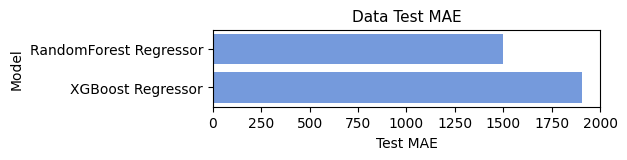

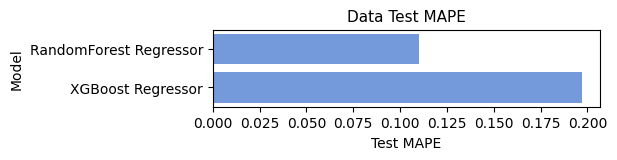

In [29]:
test_score = pd.DataFrame({
    'Model': ['RandomForest Regressor', 'XGBoost Regressor'],
    'Test MAE': test_mae,
    'Test MAPE': test_mape
     })
    
display (test_score)


tabel_metric_test = ['Test MAE', 'Test MAPE']
for i in tabel_metric_test:
    plt.figure(figsize=(5,1))
    sns.barplot(y=test_score['Model'],x=test_score[i], color = 'cornflowerblue')
    plt.title(f'Data {i}',size=11)
    plt.show()

**Model Terpilih : Random Forest Regressor**<br>
Random Forest merupakan model dengan test score terbaik *(MAE: 1498.7, MAPE: 11% )*<br>
Oleh karena itu, Random Forest akan digunakan sebagai Final Model.

**Score Random Forest Regressor**<br>
*Score Training (MAE: 1447.7, MAPE: 9,7%) <br>
Score Testing (MAE: 1498.7, MAPE: 11% )*

Score testing dan training tidak berbeda terlalu jauh sehingga dapat dikatakan model tidak overfitting.

Random Forest merupakan metode ensemble yang menggabungkan model machine learning yang sejenis tapi karakteristik data yang digunakan berbeda. Metode ini memiliki dasar yang sama yaitu Decision Tree dan dikenal juga dengan istilah tree based model. Random forest melakukan split secara random terhadap beberapa fitur dan memilih fitur nilai gini terrendah. 

**3.7 Hyperparameter Tuning on Random Forest**

Untuk memaksimalkan tingkat akurasi model, maka dilakukan optimisasi pada Hyperparameter. <br> Sebelumnya kita lihat dulu default parameter yang digunakan. Default parameter kita ikut sertakan dalam tuning untuk menghindari hasil tuning yang lebih buruk dari pada defaultnya.

In [30]:
#Default parameter yang digunakan.
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': False}

In [32]:
#Menentukan Hyperparameter apa yang akan diuji

n_estimators = list(np.arange(100, 151))    # Jumlah pohon dalam random forest
max_depth = list(np.arange(10, 51))         # Kedalaman Pohon
max_features = [1.0, 'sqrt']                # Jumlah feature pada setiap split
min_samples_split = list(np.arange(2, 11))  # Jumlah minimum sample sebelum displit
min_samples_leaf = list(np.arange(1, 11))   # Jumlah minimum sample pada setiap leaf

hyperparam_rf = {
    'model__n_estimators': n_estimators,         #nama keys variabel hyperparam harus --> (nama pipeline test)__(nama parameter), kalau tidak akan error
    'model__max_features' : max_features,
    'model__max_depth' : max_depth,
    'model__min_samples_split': min_samples_split,
    'model__min_samples_leaf': min_samples_leaf
}

estimator_rf = Pipeline([
        ('preprocessing', transformer),
        ('model', rf)
        ])

#menggunakan RandomSearchCV untuk menentukan Parameter terbaik
randomsearch_rf = RandomizedSearchCV(
    estimator = estimator_rf, 
    param_distributions = hyperparam_rf,
    n_iter = 100,
    cv = crossval, 
    scoring = ['neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_mean_absolute_error',
    random_state = 10)

In [33]:
#Fitting pada data train
randomsearch_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Vehicle '
                                                                                'Class',
                                                                                'Coverage',
                                                                                'EmploymentStatus',
                                                                                'Marital '
                                                                                'Status']),
                                                                              ('Ordinal',
                                                                               OrdinalEncoder(mapping=[{'col': 'Education',
                                                                                                        'data_type': dtype('O...
                                        'model__min_samples_leaf': [1, 2, 3, 4,
                                                                    5, 6, 7, 8,
                                                                    9, 10],
                                        'model__min_samples_split': [2, 3, 4, 5,
                                                                     6, 7, 8, 9,
                                                                     10],
                                        'model__n_estimators': [100, 101, 102,
                                                                103, 104, 105,
                                                                106, 107, 108,
                                                                109, 110, 111,
                                                                112, 113, 114,
                                                                115, 116, 117,
                                                                118, 119, 120,
                                                                121, 122, 123,
                                                                124, 125, 126,
                                                                127, 128, 129, ...]},
                   random_state=10, refit='neg_mean_absolute_error',
                   scoring=['neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [34]:
#Hasil Tuning
print('Parameter Terbaik: ')
display(randomsearch_rf.best_params_)

print('Score:', randomsearch_rf.best_score_)

Parameter Terbaik: 


{'model__n_estimators': 149,
 'model__min_samples_split': 3,
 'model__min_samples_leaf': 1,
 'model__max_features': 1.0,
 'model__max_depth': 48}

Score: -1543.3472332028416


In [35]:
#Pemodelan yang terpilih
randomsearch_rf.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('One Hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Vehicle Class', 'Coverage',
                                                   'EmploymentStatus',
                                                   'Marital Status']),
                                                 ('Ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'Education',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': None                    0
High School or Below    1
College                 2
Bachelor                3
Master                  4
Doctor                  5
dtype: int64}]),
                                                  ['Education']),
                                                 ('Scaling', RobustScaler(),
                                                  ['Number of Policies',
                                                   'Monthly Premium Auto',
                                                   'Total Claim Amount',
                                                   'Income'])])),
                ('model',
                 RandomForestRegressor(max_depth=48, min_samples_split=3,
                                       n_estimators=149, random_state=10))])

**3.8 Predict on Test Set Using Best Parameters**<br>

Melakukan prediksi pada test set dengan menggunakan model Random Forest dan hyperparameter terbaik.

In [36]:
# Define model terhadap estimator terbaik
final_rf = randomsearch_rf.best_estimator_

# Fitting model
final_rf.fit(X_train, y_train)

# Predict test set
y_pred_best_estimator = final_rf.predict(X_test)

final_test_mae = mean_absolute_error(y_test, y_pred_best_estimator)
final_test_mape = mean_absolute_percentage_error(y_test, y_pred_best_estimator)

In [37]:
# Nilai Score setelah Hyperparameter tuning
tabel_final_test_score = pd.DataFrame({
    'Model': ['Random Forest After Tuning'],
    'Test MAE': final_test_mae,
    'Test MAPE': final_test_mape
     })

tabel_final_test_score.loc [1] = test_score.loc [0]
tabel_final_test_score

,Model,Test MAE,Test MAPE
0,Random Forest After Tuning,1489.745808,0.109503
1,RandomForest Regressor,1498.679575,0.110174


**Hasil Score Setelah Tuning**<br>
Hasil score mengalami peningkatan setelah dilakukan Hyperparameter Tuning walaupun tidak signifikan. <br>

MAE:  1489.7 <br>
MAPE: 10.9% 

**3.9 Feature Importance**

Kemudian feature apa yang berpengaruh cukup tinggi terhadap nilai CLV? mari kita lihat feature importancenya.

In [38]:
feature_names = list(transformer.transformers_[0][1].get_feature_names_out())+list(transformer.transformers_[1][1].get_feature_names_out())+list(transformer.transformers_[2][1].get_feature_names_out())
feature_names = np.array(feature_names)

importance = final_rf['model'].feature_importances_

len(importance) == len (feature_names)

True

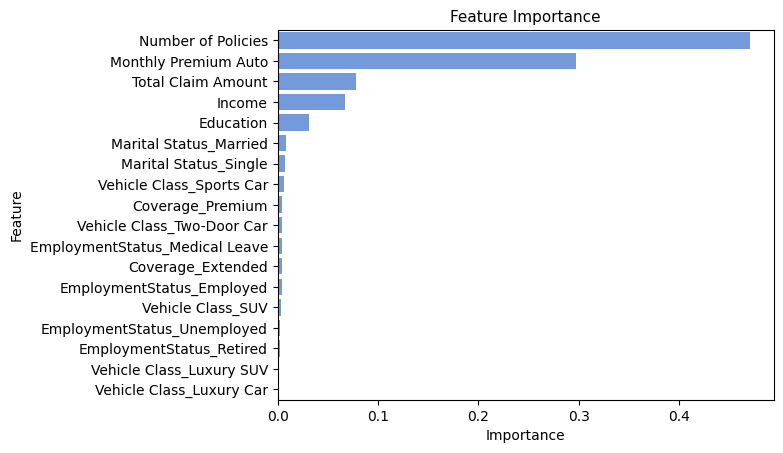

In [39]:
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance, }).sort_values(by='Importance', ascending= False)

sns.barplot(x=feature_importance['Importance'],y=feature_importance['Feature'], color = 'cornflowerblue')
plt.title('Feature Importance',size=11)
plt.show()

Dapat kita lihat bahwa '***Number of Policies***' dan '***Monthly Premium Auto***'  adalah fitur yang paling berpengaruh.<br> 

Menariknya adalah, jenis mobil yang diasuransikan, mobil biasa, sports, atau mewah, tidak berpengaruh secara signifikan terhadap nilai CLV.<br> Begitu juga dengan jenis perlindungan yang diikuti.

Penghasilan dan pendidikan merupakan profil nasabah yang dapat dipertimbangkan jika ingin mencari nasabah.

Namun, belum diketahui bagaimana arah dan besar pengaruh feature tersebut terhadap nilai CLV. Maka mari kita lihat menggunakan SHAP Summary Plot.

**SHAP Summary Plot**

100%|===================| 3958/3968 [02:12<00:00]        No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


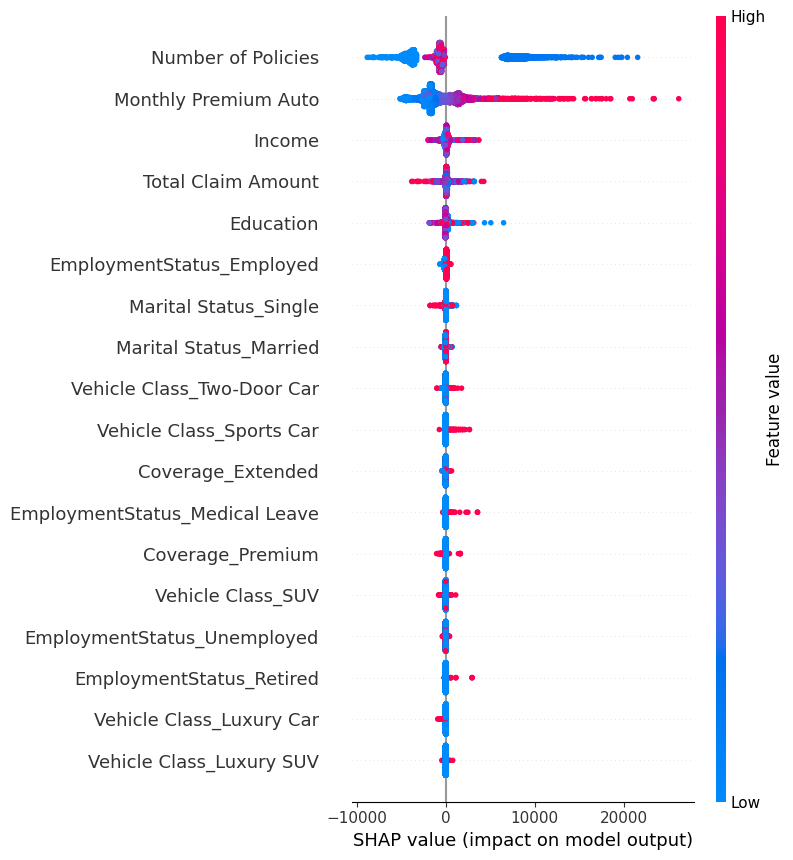

In [40]:
modelshap = rf
data = transformer.fit_transform(X_train)
featureshap = feature_names

shap_values = shap.TreeExplainer(modelshap,
                                data = data,
                                feature_pertubation = 'interventional',
                                model_output = 'raw').shap_values(data,check_additivity=False)

shap.summary_plot(shap_values, data,feature_names = feature_names )

Berdasarkan plot diatas, semakin besar nilai '***Monthly Premium Auto***', maka semakin tinggi juga nilai CLVnya. Hal ini sejalan dengan nilai CLV itu sendiri yang dapat diartikan berapa profit yang bisa dihasilkan dari seorang customer dalam jangka waktu tertentu, bahwa semakin besar premi yang dibayarkan setiap bulannya dapat menghasilkan profit yang lebih tinggi, begitu juga dengan nilai CLV nya.

Pada feature '***Number of Policies***', berdasarkan plot kurang bisa diinterpretasikan. Namun jika mengikuti domain knowledge, seharusnya semakin banyak polis yang diambil maka semakin besar nilai CLV-nya. Namun kembali lagi tergantung pada premi bulanan yang dibayarkan perbulannya apakah tinggi atau tidak.

Sedangkan fitur-fitur lain kurang berpengaruh terhadap nilai CLV.

***

### **4. Kesimpulan dan Rekomendasi**

**4.1 Kesimpulan**

**1. Model**

* Model terbaik yang digunakan adalah Random Forest Regressor.
* MAPE 10.9%: Model dapat memprediksi nilai CLV dengan cukup baik dengan prediksi yang dapat meleset sebesar 10.9% dari nilai CLV yang tepat.
* MAE 1489.7: Model dapat memprediksi nilai CLV dengan rentang error sebesar $1489.7, bisa kurang atau lebih besar dari nilai tersebut.
* Model hanya terbatas pada rentang data dari fitur yang diuji. Jika akan memprediksi data dengan nilai fitur diluar rentang tersebut, maka hasil prediksi dapat menjadi bias. Misal data memiliki nilai Income, Jumlah Polis, Premi bulanan yang lebih dari data training, prediksi dapat menjadi bias. Atau jika nantinya akan ada Jenis coverage baru atau ada jenis mobil yang lain, hasil akurasi prediksi dapat berkurang.

**2. Fitur**

* ***Monthly Premium Auto*** dan ***Number of Policies*** menjadi fitur yang paling berpengaruh. Semakin besar premi yang dibayarkan setiap bulan maka semakin besar juga nilai CLV customer.

**3. Bisnis**

* **Acquired** : Model tidak dapat digunakan untuk mencari customer baru agar menjadi nasabah, karena fitur-fitur yang di awal diklasifikasikan ke dalam Profil Customer, ternyata tidak memiliki pengaruh yang signifikan terhadap nilai CLV.
* **Retained** : Model dapat dijadikan acuan untuk mempertahankan nasabah perusahaan. Model dapat memprediksi nilai CLV, kemudian perusahaan dapat mengeluarkan biaya lebih untuk melakukan pemasaran atau treatment tertentu terhadap nasabah dengan nilai prediksi CLV yang tinggi dan dapat membatasi biaya untuk customer dengan nilai CLV rendah.


**4.2 Rekomendasi**

1. Menambah sejumlah feature baru seperti ‘jumlah mobil yang dimiliki’ dan pernah ikut asuransi lain atau tidak, untuk memperdalam analisis agar bisa dijadikan pertimbangan dalam prediksi

1. Pemodelan dapat dibantu dengan model klasifikasi ,customer yang setia(loyal) atau tidak, untuk memprediksi apakah customer yang ditarget akan berhenti menjadi nasabah atau tidak.

1. Terdapat cara lain untuk menghitung nilai CLV secara finance, selain dengan membuat model machine learning. Jika biaya untuk membuat ML lebih tinggi dibandingkan dengan keuntungan. Dapat dipertimbangkan untuk menghitung secara finance saja. Sebab setelah dilakukan pemodelan, ternyata profil nasabah berpengaruh tidak signifikan terhadap nilai CLV. Hal yang paling berpengaruh tetap berapa premi yang nasabah bayarkan setiap bulan.

***
***Terima Kasih.***

In [50]:
# Export Pickle

import pickle

# Final Model
final_model = randomsearch_rf.best_estimator_

# Fitting model
final_model.fit(X_train, y_train)

filename = 'Capstone 3 Hari Prasetyo.pkl'

pickle.dump(final_model,open(filename,'wb'))




In [42]:
final_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('One Hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Vehicle Class', 'Coverage',
                                                   'EmploymentStatus',
                                                   'Marital Status']),
                                                 ('Ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'Education',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': None                    0
High School or Below    1
College                 2
Bachelor                3
Master                  4
Doctor                  5
dtype: int64}]),
                                                  ['Education']),
                                                 ('Scaling', RobustScaler(),
                                                  ['Number of Policies',
                                                   'Monthly Premium Auto',
                                                   'Total Claim Amount',
                                                   'Income'])])),
                ('model',
                 RandomForestRegressor(max_depth=48, min_samples_split=3,
                                       n_estimators=149, random_state=10))])